In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
import os
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report


import matplotlib as mpl
import matplotlib.cm as cm
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 10

from Funciones import *

In [2]:
def grafica_mc(y_test, y_test_pred, path_save = './Figura_mc.png'):  

    mc= confusion_matrix(y_test, y_test_pred)

    plt.figure(figsize=(3,3))
    sns.heatmap(mc, annot=True,  fmt='d', cbar=False, linecolor='black', linewidths=0.7,cmap=plt.cm.Blues)
    plt.xlabel('Predicción')
    plt.ylabel('Observación')
    plt.savefig(path_save, bbox_inches='tight', dpi=150)

def graf_cross_val(model, X_train, y_train, cv, scorings=['accuracy'], path = './', name = 'Figura.png'):
    
    for scoring in scorings:

        results = cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring)
        print(results)
        print(results.mean())

        plt.figure(figsize=(3,3))
        plt.plot(np.arange(1,len(results)+1), results)
        plt.xlabel('Validación cruzada')
        plt.ylabel(scoring)
        plt.ylim([0,1])
        plt.savefig(path+name.replace('.png', f'_{scoring}.png'), bbox_inches='tight', dpi=150)
        
        
def graf_learning_curve(model, X_train, y_train, cv, scorings,  path = './', name = 'Figura.png'):
    
    for scoring in scorings:

        lc = learning_curve(model,X_train, y_train, cv=cv, scoring=scoring)
        train_sizes, train_scores, test_scores = lc[0], lc[1], lc[2]

        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        plt.figure(figsize=(5,5))
        plt.title("Curva de aprendizaje")    
        plt.xlabel("Muestras")
        plt.ylabel(scoring)
        plt.grid()
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,color="r")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label = f"{scoring} entrenamiento")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label=f"{scoring} validación")
        plt.ylim([0.5,1])
        plt.legend(loc="best");
        plt.savefig(path+name.replace('.png', f'_{scoring}.png'), bbox_inches='tight', dpi=150)

In [3]:
ruta_base  = os.path.dirname(os.path.abspath('./')) + '/'
ruta_datos = ruta_base + 'Datos/'
ruta_shp   = ruta_datos+ 'Shapefiles/'
ruta_imagenes = ruta_base + 'Imagenes/'

In [4]:
# Carga información
datos_pcs = pd.read_csv(ruta_datos+'Datos_PCS.csv', index_col=0, parse_dates=True)

In [5]:
# pcs utilizadas
pcs_util =  ['PC1', 'PC2', 'PC18', 'PC9', 'PC6', 'PC16', 'PC7', 'PC8', 'Caudal']

datos_pcs = datos_pcs[pcs_util]

## Supongamos que solo nos interesa las inundaciones

In [6]:
datos_clasif = datos_pcs.copy()
datos_clasif['Caudal'][datos_pcs['Caudal']>=1]=1 # 1 desviación estandar
datos_clasif['Caudal'][datos_pcs['Caudal']<1]=0

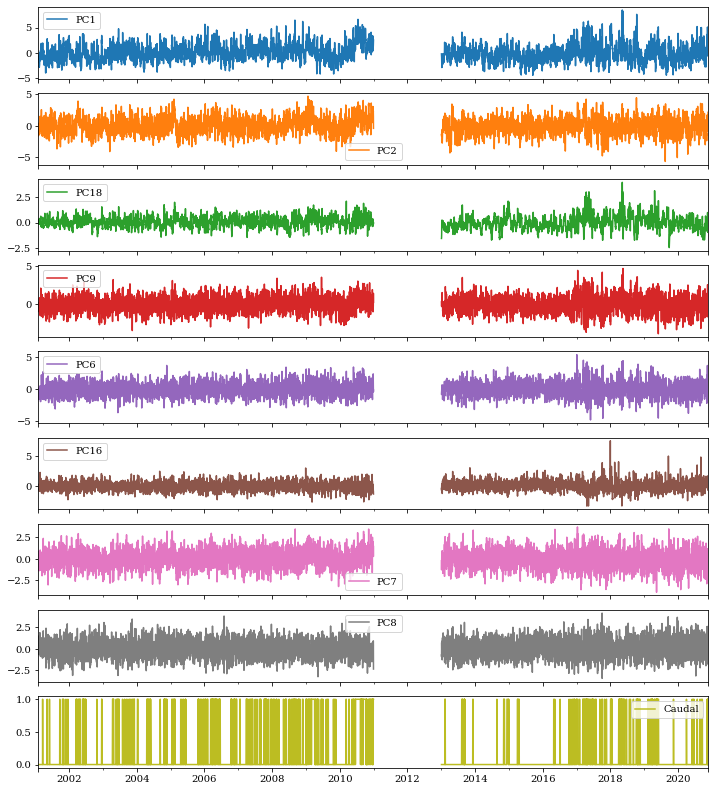

In [7]:
pcs_y_gra = datos_clasif.copy()
pcs_y_gra = pcs_y_gra.asfreq('D')
pcs_y_gra.plot(subplots=True, figsize=(12,14))
plt.savefig(ruta_imagenes+'Series_PCs_clasif_max.png', bbox_inches='tight', dpi=150)

### Definición de variables independientes y dependiente

In [8]:
X = datos_clasif.drop(['Caudal'],axis=1)
y = datos_clasif['Caudal']

In [9]:
y.value_counts()

0.0    5560
1.0     937
Name: Caudal, dtype: int64

In [10]:
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import train_test_split

In [11]:
f_train = '2016-12-31'
f_test  = '2017-01-01'

X_train = X[:f_train]
X_test  = X[f_test:]

y_train = y[:f_train]
y_test  = y[f_test:]

kfold = KFold(n_splits=5, shuffle= False)

### Definir tipo de arreglo para el balanceo

In [12]:
# lr=LogisticRegression()
# results = cross_val_score(lr, X_train, y_train, cv=kfold, scoring='accuracy')
# print(results)
# print(results.mean())

# model=lr.fit(X_train,y_train)
# y_test_pred=model.predict(X_test)
# print(Counter(y_test_pred))

# mc= confusion_matrix(y_test, y_test_pred)
# print(mc)

# #  figura de matriz de confución
# plt.figure(figsize=(5,5))
# sns.heatmap(mc, annot=True, cbar=False, linecolor='black',linewidths=0.7,cmap=plt.cm.Blues)
# plt.xlabel('Predicted')
# plt.ylabel('Expected')
# plt.savefig(ruta_imagenes+'MC_lr_clasif_max.png', bbox_inches='tight', dpi=150)

### Regresión logistica balanceada

In [13]:
# lr=LogisticRegression(class_weight='balanced')
# results = cross_val_score(lr, X_train, y_train, cv=kfold, scoring='accuracy')
# print(results)
# print(results.mean())

# model=lr.fit(X_train,y_train)
# y_test_pred=model.predict(X_test)
# print(Counter(y_test_pred))

# mc= confusion_matrix(y_test, y_test_pred)
# print(mc)

# #  figura de matriz de confución
# plt.figure(figsize=(5,5))
# sns.heatmap(mc, annot=True, cbar=False, linecolor='black',linewidths=0.7,cmap=plt.cm.Blues)
# plt.xlabel('Predicted')
# plt.ylabel('Expected')
# plt.savefig(ruta_imagenes+'MC_lr_balance_clasif_max.png', bbox_inches='tight', dpi=150)

### undersamplig

In [14]:
# from imblearn.under_sampling import RandomUnderSampler
# rus=RandomUnderSampler()
# X_rus,y_rus=rus.fit_sample(X_train,y_train)

# lr=LogisticRegression()
# results = cross_val_score(lr, X_rus, y_rus, cv=kfold, scoring='accuracy')
# print(results)
# print(results.mean())

# model=lr.fit(X_rus,y_rus)
# y_test_pred=model.predict(X_test)
# print(Counter(y_test_pred))

# mc= confusion_matrix(y_test, y_test_pred)
# print(mc)

# #  figura de matriz de confución
# plt.figure(figsize=(5,5))
# sns.heatmap(mc, annot=True, cbar=False, linecolor='black',linewidths=0.7,cmap=plt.cm.Blues)
# plt.xlabel('Predicted')
# plt.ylabel('Expected')
# plt.savefig(ruta_imagenes+'MC_lr_under_max.png', bbox_inches='tight', dpi=150)

### SMOTE

In [15]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE()
# X_sm, y_sm = sm.fit_sample(X_train, y_train)

# lr=LogisticRegression()
# results = cross_val_score(lr, X_sm, y_sm, cv=kfold, scoring='accuracy')
# print(results)
# print(results.mean())

# model=lr.fit(X_sm,y_sm)
# y_test_pred=model.predict(X_test)
# print(Counter(y_test_pred))

# mc= confusion_matrix(y_test, y_test_pred)
# print(mc)

# #  figura de matriz de confución
# plt.figure(figsize=(5,5))
# sns.heatmap(mc, annot=True, cbar=False, linecolor='black',linewidths=0.7,cmap=plt.cm.Blues)
# plt.xlabel('Predicted')
# plt.ylabel('Expected')
# plt.savefig(ruta_imagenes+'MC_lr_smote_max.png', bbox_inches='tight', dpi=150)

### Oversampling

In [16]:
# from imblearn.over_sampling import RandomOverSampler
# ros=RandomOverSampler()
# X_ros,y_ros=ros.fit_sample(X_train,y_train)

# results = cross_val_score(lr, X_ros, y_ros, cv=kfold, scoring='accuracy')
# print(results)
# print(results.mean())

# model=lr.fit(X_ros,y_ros)
# y_test_pred=model.predict(X_test)
# print(Counter(y_test_pred))

# mc= confusion_matrix(y_test, y_test_pred)
# print(mc)

# #  figura de matriz de confución
# plt.figure(figsize=(5,5))
# sns.heatmap(mc, annot=True, cbar=False, linecolor='black',linewidths=0.7,cmap=plt.cm.Blues)
# plt.xlabel('Predicted')
# plt.ylabel('Expected')
# plt.savefig(ruta_imagenes+'MC_lr_over_max.png', bbox_inches='tight', dpi=150)


## Mejor desempeño oversamplig

In [17]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
X_ros,y_ros=ros.fit_sample(X_train,y_train)

## Regresión logistica

In [18]:
lr=LogisticRegression()

[0.8316092  0.79195402 0.90804598 0.79873491 0.82058654]
0.8301861289021965
[0.83225806 0.90176322 0.86833856 0.79873491 0.82058654]
0.8443362591599806


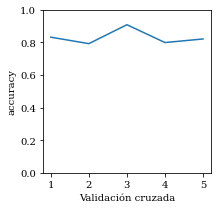

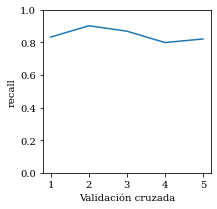

In [19]:
# validación cruzada
graf_cross_val(model=lr, X_train=X_ros, y_train=y_ros, cv=kfold, path=ruta_imagenes, name='LR_CV.png', scorings = ['accuracy', 'recall'])

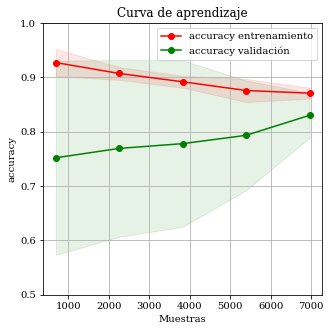

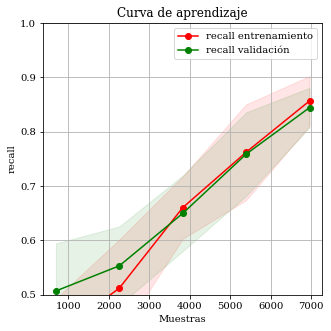

In [20]:
# Grafica de curva de aprendizaje
graf_learning_curve(model=lr, X_train=X_ros, y_train=y_ros, cv=kfold, path=ruta_imagenes, name='LR_LC.png', scorings = ['accuracy', 'recall'])

              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92      1211
         1.0       0.53      0.78      0.63       209

    accuracy                           0.87      1420
   macro avg       0.75      0.83      0.78      1420
weighted avg       0.90      0.87      0.88      1420



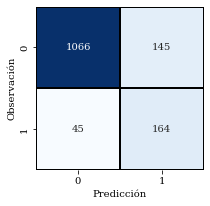

In [21]:
# Matriz de confución en test
model=lr.fit(X_ros,y_ros)
y_test_pred=model.predict(X_test)
grafica_mc(y_test,y_test_pred, path_save=ruta_imagenes+'MC_lr_over_max.png')
print(classification_report(y_test,y_test_pred))

### Desempeño bajo la curva roc

              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92      1211
         1.0       0.53      0.78      0.63       209

    accuracy                           0.87      1420
   macro avg       0.75      0.83      0.78      1420
weighted avg       0.90      0.87      0.88      1420

          fpr       tpr     1-fpr        tf  threshold
135  0.172585  0.827751  0.827415  0.000336     0.3938
[0.39380028085553254]


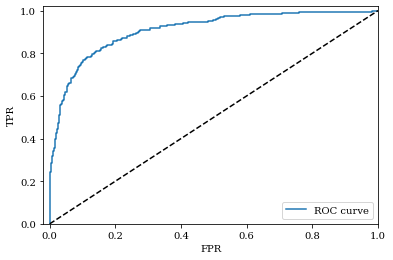

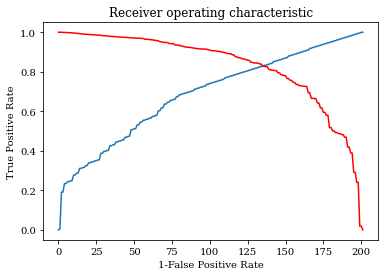

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

predicted = model.predict(X_test)
report = classification_report(y_test, predicted)
print(report)

probs=model.predict_proba(X_test)
y_pred_proba = probs[:,1]

fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr, label='ROC curve')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.02,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4);
plt.savefig(ruta_imagenes+'ROC_maximos.png', bbox_inches='tight', dpi=150)

i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'threshold' : pd.Series(threshold, index = i)})
best=roc.iloc[(roc.tf-0).abs().argsort()[:1]]
print(best)

# Plot tpr vs 1-fpr
fig, ax = plt.subplots()
plt.plot(roc['tpr'],label='TPR')
plt.plot(roc['1-fpr'], color = 'red',label='1-FPR')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
# ax.set_xticklabels([]);

best_threshold=list(best['threshold'])
print(best_threshold)


## Analisis discriminante

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis(n_components=1)
data_projected = LDA.fit_transform(X_ros,y_ros)
print(data_projected.shape)

(8698, 1)


In [25]:
# dataframe
df = pd.DataFrame(np.concatenate((data_projected, np.atleast_2d(y_ros.values).T), axis=1), columns = ['LDA', 'Ocurrencia'])

In [26]:
data_sin=df[(df['Ocurrencia']==0)]
data_con=df[(df['Ocurrencia']==1)]

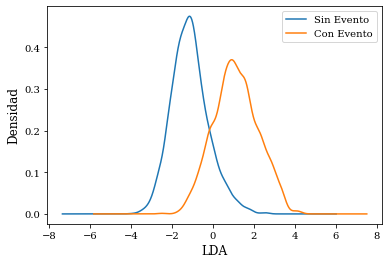

In [27]:
fig, ax = plt.subplots()
data_sin['LDA'].plot.kde(ax=ax, label='Sin Evento')
data_con['LDA'].plot.kde(ax=ax, label='Con Evento')
ax.set_xlabel('LDA', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)
plt.savefig(ruta_imagenes+'densidad_LDA.png', bbox_inches='tight', dpi=150)

[0.84885057 0.80344828 0.91436782 0.78378378 0.80448534]
0.8309871573701362
[0.82580645 0.88161209 0.85893417 0.78378378 0.80448534]
0.8309243663512028


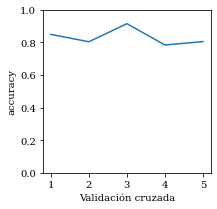

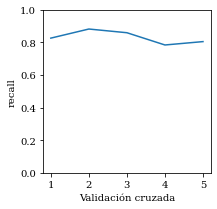

In [28]:
# validación cruzada
graf_cross_val(model=LDA, X_train=X_ros, y_train=y_ros, cv=kfold, path=ruta_imagenes, name='LDA_CV.png', scorings = ['accuracy', 'recall'])

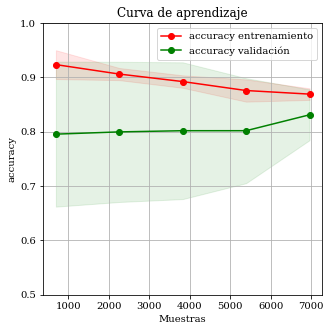

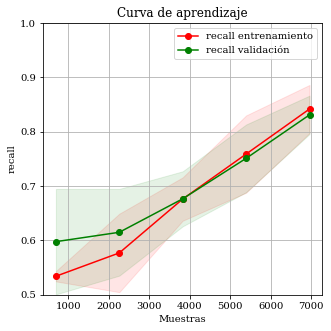

In [29]:
# Grafica de curva de aprendizaje
graf_learning_curve(model=LDA, X_train=X_ros, y_train=y_ros, cv=kfold, path=ruta_imagenes, name='LDA_LC.png', scorings = ['accuracy', 'recall'])

              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93      1211
         1.0       0.56      0.78      0.65       209

    accuracy                           0.88      1420
   macro avg       0.76      0.84      0.79      1420
weighted avg       0.90      0.88      0.89      1420



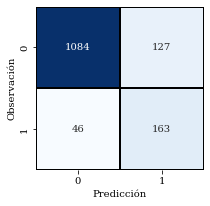

In [30]:
# Matriz de confución
y_test_pred = LDA.predict(X_test)
grafica_mc(y_test,y_test_pred, path_save=ruta_imagenes+'MC_LDA.png')
print(classification_report(y_test,y_test_pred))

In [48]:
# #calcular la probabilidad para cada clase
# y_prob=LDA.predict_proba(X_test)
# prob_si=LDA.predict_proba(X_test)[:,1]

              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93      1211
         1.0       0.56      0.78      0.65       209

    accuracy                           0.88      1420
   macro avg       0.76      0.84      0.79      1420
weighted avg       0.90      0.88      0.89      1420



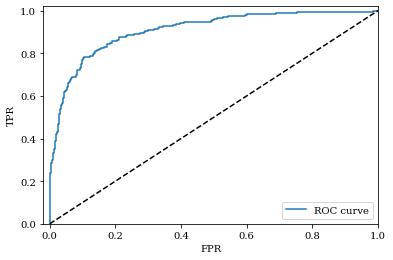

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

predicted = LDA.predict(X_test)
report = classification_report(y_test, predicted)
print(report)

probs=LDA.predict_proba(X_test)
y_pred_proba = probs[:,1]

fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr, label='ROC curve')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.02,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4);
plt.savefig(ruta_imagenes+'ROC_maximos_LDA.png', bbox_inches='tight', dpi=150)

## KNN (Vecino más cercano)

### Prueba de hiperparametros con vecino más cercano

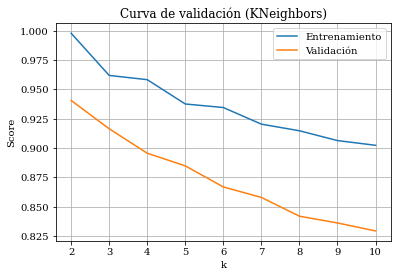

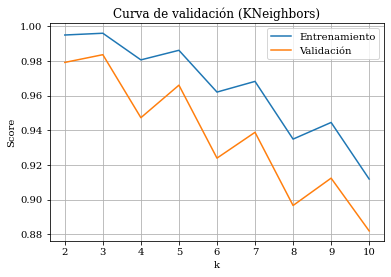

In [55]:
from sklearn.model_selection import validation_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

k = np.arange(2,11)

# acurracy
train_scores, test_scores = validation_curve(KNeighborsClassifier(), X_ros, y_ros, param_name='n_neighbors', param_range=k, cv=kfold, scoring='accuracy')

plt.figure()
plt.title("Curva de validación (KNeighbors)")    
plt.xlabel("k")
plt.ylabel("Score")
plt.plot(np.mean(train_scores,axis=1),label="Entrenamiento")
plt.plot(np.mean(test_scores,axis=1),label="Validación")
plt.xticks(np.arange(9),k)
plt.legend(loc="best")
plt.grid(True);
plt.savefig(ruta_imagenes+'Curva_val_hiper_Kneig_max.png', bbox_inches='tight', dpi=150)

k = np.arange(2,11)

# recall
train_scores, test_scores = validation_curve(KNeighborsClassifier(), X_ros, y_ros, param_name='n_neighbors', param_range=k, cv=kfold, scoring='recall')

plt.figure()
plt.title("Curva de validación (KNeighbors)")    
plt.xlabel("k")
plt.ylabel("Score")
plt.plot(np.mean(train_scores,axis=1),label="Entrenamiento")
plt.plot(np.mean(test_scores,axis=1),label="Validación")
plt.xticks(np.arange(9),k)
plt.legend(loc="best")
plt.grid(True);
plt.savefig(ruta_imagenes+'Curva_val_hiper_Kneig_max_recall.png', bbox_inches='tight', dpi=150)

In [56]:
# modelo
n_neighbors=3
KNN = KNeighborsClassifier(n_neighbors=n_neighbors)

[0.8637931  0.84712644 0.91551724 0.97297297 0.98274871]
0.9164316921470259
[0.98709677 0.98740554 0.98746082 0.97297297 0.98274871]
0.9835369619856437


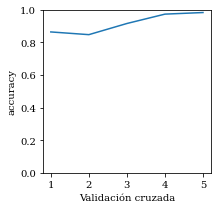

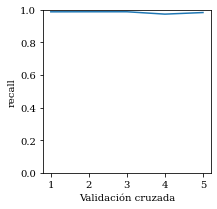

In [57]:
# validación cruzada
graf_cross_val(model=KNN, X_train=X_ros, y_train=y_ros, cv=kfold, path=ruta_imagenes, name='KNN_CV.png', scorings = ['accuracy', 'recall'])

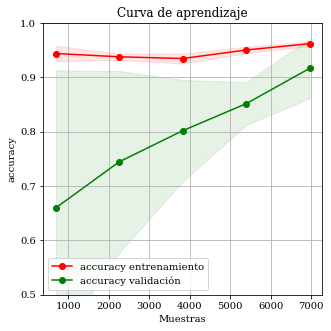

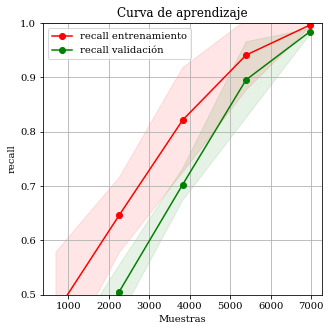

In [58]:
# Grafica de curva de aprendizaje
graf_learning_curve(model=KNN, X_train=X_ros, y_train=y_ros, cv=kfold, path=ruta_imagenes, name='KNN_LC.png', scorings = ['accuracy', 'recall'])

              precision    recall  f1-score   support

         0.0       0.93      0.88      0.90      1211
         1.0       0.46      0.63      0.53       209

    accuracy                           0.84      1420
   macro avg       0.70      0.75      0.72      1420
weighted avg       0.86      0.84      0.85      1420



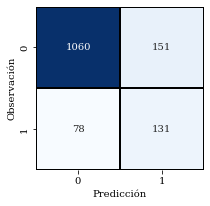

In [65]:
# Matriz de confución
model = KNN.fit(X_ros, y_ros)
y_test_pred = model.predict(X_test)
grafica_mc(y_test,y_test_pred, path_save=ruta_imagenes+'MC_KNN.png')
print(classification_report(y_test,y_test_pred))